In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
file_path = 'ToyotaCorolla - MLR.csv'
df = pd.read_csv(file_path)
df.head()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
summary_stats = df.describe()
df.describe()
# Price: The average price is €10,730.82, with a minimum of €4,350 and a maximum of €32,500.
#Age_08_04: The cars' ages range from 1 to 80 months, with an average of about 56 months.
#KM: The mileage varies from 1 to 243,000 kilometers, with an average of about 68,533 kilometers.
#HP: Horsepower ranges from 69 to 192, with an average of approximately 101.5.
#Automatic: Most cars are manual (only about 5.6% are automatic).
#cc: Cylinder capacity varies from 1300 to 16000 cc, with an average of about 1576.86 cc.
#Doors: The cars mostly have 3 to 5 doors, with an average of about 4 doors.
#Cylinders: All cars have 4 cylinders.
#Gears: Cars have between 3 and 6 gears, with an average of about 5 gears.
#Weight: Weight ranges from 1000 to 1615 kilograms, with an average of about 1072.46 kg.

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
df.isna().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


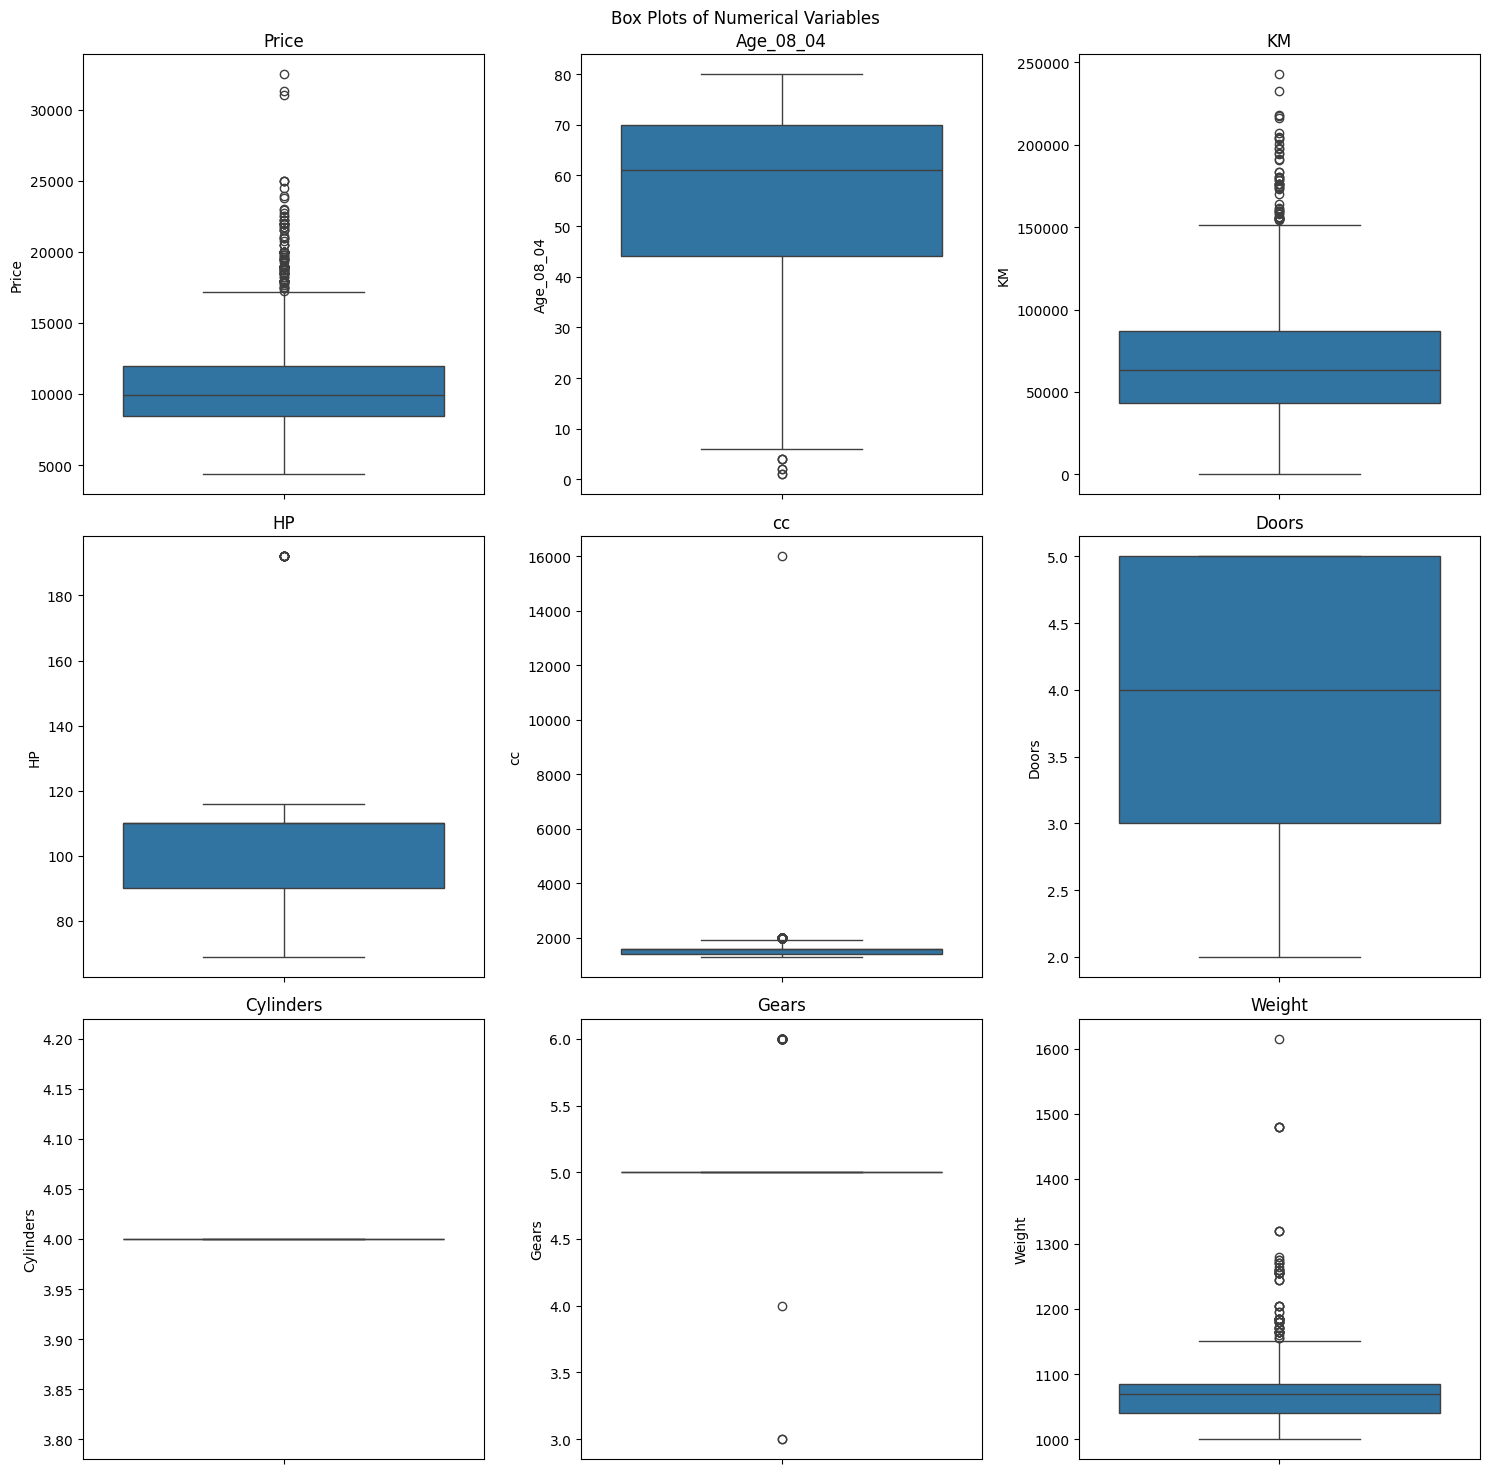

In [ ]:
# visulaization for numerical variables
num_vars = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.suptitle('Box Plots of Numerical Variables')

for i, var in enumerate(num_vars):
    sns.boxplot(data=df, y=var, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(var)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

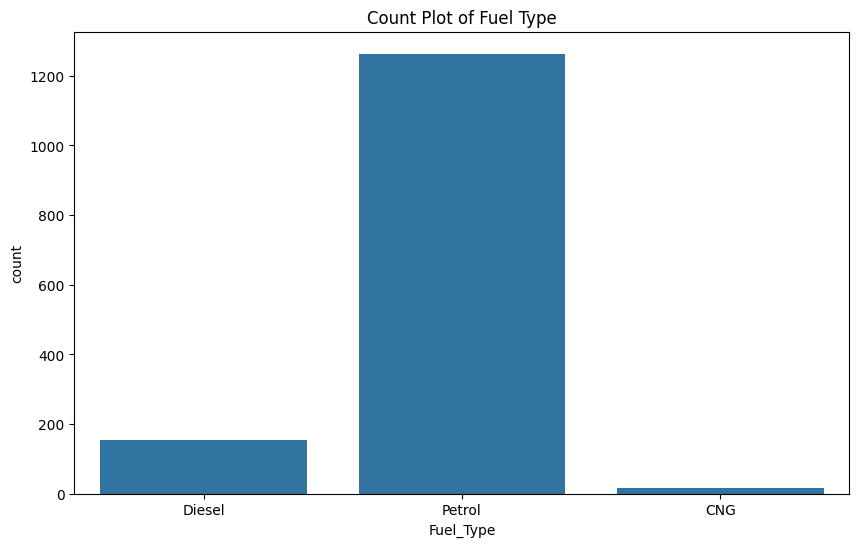

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Fuel_Type')
plt.title('Count Plot of Fuel Type')
plt.show()

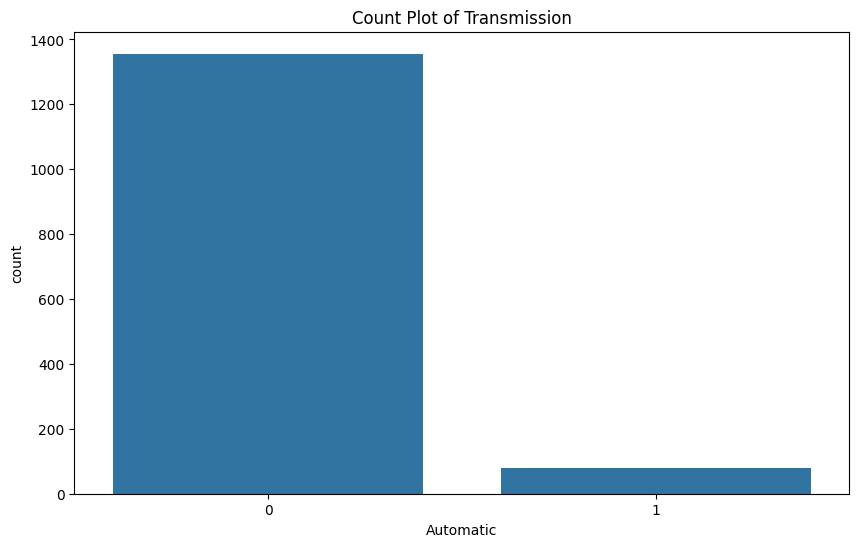

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Automatic')
plt.title('Count Plot of Transmission')
plt.show()

In [ ]:
# selecting the features and target variable
X = df.drop(columns=['Price'])
y = df['Price']


In [ ]:
# Identify categorical columns
categorical_columns = ['Fuel_Type']

# Define the ColumnTransformer to handle categorical encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns)  # Drop the first category to avoid dummy variable trap
    ],
    remainder='passthrough'  # Keep the remaining columns as they are
)

# Transform the features
X_transformed = preprocessor.fit_transform(X)

# Convert the transformed features back to a DataFrame for better readability
feature_names = preprocessor.get_feature_names_out()
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.2, random_state=42)

In [ ]:
# Define the evaluate_model function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    return mse, r2

In [ ]:
# Model 1: Using all features
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
print("Model 1 Coefficients:")
print(pd.DataFrame({'Feature': feature_names, 'Coefficient': model_1.coef_}))

# Drop 'Gears' and 'Cylinders' from features for Model 2
X_train_2 = X_train.drop(columns=['remainder__Gears', 'remainder__Cylinders'])
X_test_2 = X_test.drop(columns=['remainder__Gears', 'remainder__Cylinders'])

# Model 2: Excluding 'Gears' and 'Cylinders'
model_2 = LinearRegression()
model_2.fit(X_train_2, y_train)
print("Model 2 Coefficients:")
print(pd.DataFrame({'Feature': X_train_2.columns, 'Coefficient': model_2.coef_}))

# Drop 'Doors' and 'Weight' from features for Model 3
X_train_3 = X_train.drop(columns=['remainder__Doors', 'remainder__Weight'])
X_test_3 = X_test.drop(columns=['remainder__Doors', 'remainder__Weight'])

# Model 3: Excluding 'Doors' and 'Weight'
model_3 = LinearRegression()
model_3.fit(X_train_3, y_train)
print("Model 3 Coefficients:")
print(pd.DataFrame({'Feature': X_train_3.columns, 'Coefficient': model_3.coef_}))

Model 1 Coefficients:
                  Feature   Coefficient
0   cat__Fuel_Type_Diesel -6.854876e+01
1   cat__Fuel_Type_Petrol  1.370809e+03
2    remainder__Age_08_04 -1.208305e+02
3           remainder__KM -1.623141e-02
4           remainder__HP  1.403948e+01
5    remainder__Automatic  1.488309e+02
6           remainder__cc -3.037219e-02
7        remainder__Doors -6.031097e+01
8    remainder__Cylinders -1.080025e-12
9        remainder__Gears  5.516007e+02
10      remainder__Weight  2.588496e+01
Model 2 Coefficients:
                 Feature  Coefficient
0  cat__Fuel_Type_Diesel     4.202110
1  cat__Fuel_Type_Petrol  1453.694461
2   remainder__Age_08_04  -120.823078
3          remainder__KM    -0.015927
4          remainder__HP    15.777213
5   remainder__Automatic    93.081993
6          remainder__cc    -0.030236
7       remainder__Doors   -84.483547
8      remainder__Weight    26.069186
Model 3 Coefficients:
                 Feature  Coefficient
0  cat__Fuel_Type_Diesel  2642.96845

In [ ]:

# Evaluate models
print("Model 1 Performance:")
evaluate_model(model_1, X_test, y_test)

print("Model 2 Performance:")
evaluate_model(model_2, X_test_2, y_test)

print("Model 3 Performance:")
evaluate_model(model_3, X_test_3, y_test)

Model 1 Performance:
Mean Squared Error: 2203043.823142985
R-squared: 0.8348888040611621
Model 2 Performance:
Mean Squared Error: 2224306.040394122
R-squared: 0.8332952678446931
Model 3 Performance:
Mean Squared Error: 2148012.3359302143
R-squared: 0.8390132407031125


(2148012.3359302143, 0.8390132407031125)

In [ ]:
from sklearn.linear_model import  Lasso, Ridge

In [ ]:
# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
print("Lasso Regression Performance:")
evaluate_model(lasso, X_test, y_test)
print("Lasso Regression Coefficients:")
print(pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso.coef_}))

Lasso Regression Performance:
Mean Squared Error: 2195388.0799735477
R-squared: 0.8354625778995339
Lasso Regression Coefficients:
                  Feature  Coefficient
0   cat__Fuel_Type_Diesel   -32.314422
1   cat__Fuel_Type_Petrol  1364.391209
2    remainder__Age_08_04  -120.798020
3           remainder__KM    -0.016326
4           remainder__HP    14.559177
5    remainder__Automatic   133.400676
6           remainder__cc    -0.032399
7        remainder__Doors   -58.673395
8    remainder__Cylinders     0.000000
9        remainder__Gears   522.177460
10      remainder__Weight    25.721981


In [ ]:

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge Regression Performance:")
evaluate_model(ridge, X_test, y_test)
print("Ridge Regression Coefficients:")
print(pd.DataFrame({'Feature': feature_names, 'Coefficient': ridge.coef_}))

Ridge Regression Performance:
Mean Squared Error: 2199746.3702333374
R-squared: 0.8351359377712337
Ridge Regression Coefficients:
                  Feature  Coefficient
0   cat__Fuel_Type_Diesel  -128.813072
1   cat__Fuel_Type_Petrol  1294.949826
2    remainder__Age_08_04  -120.779659
3           remainder__KM    -0.016324
4           remainder__HP    14.141834
5    remainder__Automatic   146.907470
6           remainder__cc    -0.030509
7        remainder__Doors   -59.905791
8    remainder__Cylinders     0.000000
9        remainder__Gears   542.272328
10      remainder__Weight    25.821019


In [ ]:
''' The coefficients of the regression models represent the change in the target variable (Price) for a one-unit change in the predictor variable.
age and car price are inversely correlated. higher mileage reduced the price but higher horsepower increases the price.
Engine is stronglt correlated to price, but doors have minimal impact.
Age, Mileage, horsepower, engine and fuel type were the most influential features in predicting the price.